# Zip code analysis

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv('data/cleaned.csv')

In [13]:
X = pd.get_dummies(df.zipcode, drop_first=False)
y = df.price.apply(np.log10)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [16]:
model = sm.OLS(y_train, X_train).fit()


In [28]:
zips = model.params.reset_index()
zips.columns = ['zip_code', 'mean_log_price']

In [34]:
quartiles = zips.mean_log_price.quantile(q=[0.25, 0.5, 0.75])

array([[<AxesSubplot:title={'center':'zip_code'}>,
        <AxesSubplot:title={'center':'mean_log_price'}>]], dtype=object)

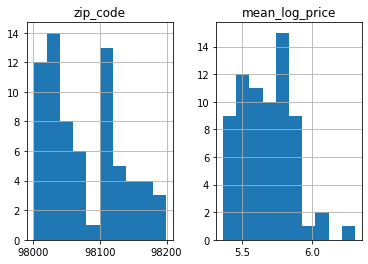

In [35]:
zips.hist()